# Análise Exploratória de Dados

## Dataset
- Fonte : https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent


## Informações sobre os dados

- Colunas
    - city: Nome da cidade onde os dados foram obtidos
    - area: Área em m² do imóvel 
    - rooms: Número de Quartos
    - bathroom:Número de Banheiros
    - parking spaces: Quantidade de garagens
    - floor: Andar do imovel
    - animal: Aceita Animais domesticos?
    - furniture: Imóvel Imobiliado?
    - hoa (R\$): Valor do condomínio
    - rent amount (R\$): Valor do Aluguel
    - property tax (R\$): Valor do IPTU
    - fire insurance (R\$): Valor do Seguro de Incêndio
    - total (R\$): Valor total de aluguel do imóvel

## Objetivos
- Os dados apresentam dados de outras cidades além de São Paulo (Rio de Janeiro, Campinas, Porto Alegre), o objetivo é fazer um recorte especifico da cidade de são Paulo e Análisar os dados

## Perguntas
- Permitir Animais de estimação aumenta o preço do aluguel?
- Permitir Animais de estimação tem relação com o tamanho do imóvel?
- Qual a proporção de imóveis que aceitam animais de estimação?
- Existe uma correlação entre a quantidade de quartos e o valor do condomínio?
- Como a quantidade de garagens se relaciona com o valor do seguro contra incêndio?
- Qual é a média de despesas com IPTU em São Paulo?
- Qual a diferença média de preço entre imóveis mobiliados e não mobiliados?
- O andar interfere no preço?

In [212]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

In [112]:
# carregar base de dados
precoAluguelImoveisSP_df = pd.read_csv('./dados_preço_aluguel_BR.csv', sep=',')

In [113]:
precoAluguelImoveisSP_df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


## Pré Processamento

In [114]:
precoAluguelImoveisSP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


* O floor está como object, mas é para ser um tipo int64, pois são valores numericos

### Corrigir coluna "floor"

In [115]:
# Transformar de object para numerico
precoAluguelImoveisSP_df['floor'] = pd.to_numeric(precoAluguelImoveisSP_df['floor'], errors='coerce')

In [116]:
precoAluguelImoveisSP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 10692 non-null  object 
 1   area                 10692 non-null  int64  
 2   rooms                10692 non-null  int64  
 3   bathroom             10692 non-null  int64  
 4   parking spaces       10692 non-null  int64  
 5   floor                8231 non-null   float64
 6   animal               10692 non-null  object 
 7   furniture            10692 non-null  object 
 8   hoa (R$)             10692 non-null  int64  
 9   rent amount (R$)     10692 non-null  int64  
 10  property tax (R$)    10692 non-null  int64  
 11  fire insurance (R$)  10692 non-null  int64  
 12  total (R$)           10692 non-null  int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 1.1+ MB


In [117]:
# Verificar valores nulos
precoAluguelImoveisSP_df.isnull().any()

city                   False
area                   False
rooms                  False
bathroom               False
parking spaces         False
floor                   True
animal                 False
furniture              False
hoa (R$)               False
rent amount (R$)       False
property tax (R$)      False
fire insurance (R$)    False
total (R$)             False
dtype: bool

Os valores foram alterados para float, mas agora foi obtido valores nulos na coluna floor

Para resolver esse problema pode-se tirar essa coluna da análise, pode-se colocar valores padrões (exemplo, primeiro andar em todos) ou pode remover as linhas com dados faltantes.

De antemão, deixarei claro que a coluna não irá ser removida, pois é necessaria para análises.

Para prosseguir, irei filtrar os dados de interesse primeiro, ou seja, apenas imóveis da cidade de São Paulo, após isso tomarei a decisão do que fazer com os dados faltantes, pois se for poucos dados que estejam faltando para o caso de São Paulo, é possivel simplesmente remover as linhas com dados faltantes

In [118]:
# Pegar apenas dados da cidade de São Paulo
selecao = precoAluguelImoveisSP_df['city'] == 'São Paulo'

In [119]:
precoAluguelImoveisSP_df = precoAluguelImoveisSP_df[selecao]
precoAluguelImoveisSP_df.head()


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7.0,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20.0,acept,not furnished,1200,4960,1750,63,7973
4,São Paulo,25,1,1,0,1.0,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,NaN,acept,not furnished,0,8000,834,121,8955
7,São Paulo,213,4,4,4,4.0,acept,not furnished,2254,3223,1735,41,7253


In [120]:
precoAluguelImoveisSP_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5887 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 5887 non-null   object 
 1   area                 5887 non-null   int64  
 2   rooms                5887 non-null   int64  
 3   bathroom             5887 non-null   int64  
 4   parking spaces       5887 non-null   int64  
 5   floor                4273 non-null   float64
 6   animal               5887 non-null   object 
 7   furniture            5887 non-null   object 
 8   hoa (R$)             5887 non-null   int64  
 9   rent amount (R$)     5887 non-null   int64  
 10  property tax (R$)    5887 non-null   int64  
 11  fire insurance (R$)  5887 non-null   int64  
 12  total (R$)           5887 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 643.9+ KB


Existem 5887 dados referente a cidade de São Paulo, e existem apenas 4273 dados na coluna floor que são validos, ou seja existem 1.614 dados invalidos nessa coluna, 27,41% dos dados seriam excluidos se optasse por tirar as linhas com dados nulos, logo esses valores faltantes serão completos com a mediana.

In [121]:
mediana = precoAluguelImoveisSP_df['floor'].median()
precoAluguelImoveisSP_df['floor'] = precoAluguelImoveisSP_df['floor'].fillna(mediana)

In [122]:
precoAluguelImoveisSP_df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7.0,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20.0,acept,not furnished,1200,4960,1750,63,7973
4,São Paulo,25,1,1,0,1.0,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,7.0,acept,not furnished,0,8000,834,121,8955
7,São Paulo,213,4,4,4,4.0,acept,not furnished,2254,3223,1735,41,7253


In [123]:
precoAluguelImoveisSP_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5887 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 5887 non-null   object 
 1   area                 5887 non-null   int64  
 2   rooms                5887 non-null   int64  
 3   bathroom             5887 non-null   int64  
 4   parking spaces       5887 non-null   int64  
 5   floor                5887 non-null   float64
 6   animal               5887 non-null   object 
 7   furniture            5887 non-null   object 
 8   hoa (R$)             5887 non-null   int64  
 9   rent amount (R$)     5887 non-null   int64  
 10  property tax (R$)    5887 non-null   int64  
 11  fire insurance (R$)  5887 non-null   int64  
 12  total (R$)           5887 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 643.9+ KB


# Entender os dados e corrigir

In [124]:
precoAluguelImoveisSP_df[['area','rooms','bathroom', 'parking spaces', 'hoa (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']].describe().T

,count,mean,std,min,25%,50%,75%,max
area,5887.0,158.899439,347.474169,11.0,59.0,106.0,212.0,24606.0
rooms,5887.0,2.558859,1.166365,1.0,2.0,3.0,3.0,10.0
bathroom,5887.0,2.467641,1.503060,1.0,1.0,2.0,4.0,10.0
parking spaces,5887.0,1.877527,1.687973,0.0,1.0,1.0,3.0,12.0
hoa (R$),5887.0,1169.627994,4076.461180,0.0,0.0,665.0,1608.5,220000.0
property tax (R$),5887.0,495.701716,4153.618928,0.0,37.0,170.0,550.0,313700.0
fire insurance (R$),5887.0,62.428911,50.073429,4.0,26.0,45.0,83.0,677.0
total (R$),5887.0,6380.831833,7541.320897,508.0,2631.0,4596.0,8591.0,316900.0


## total

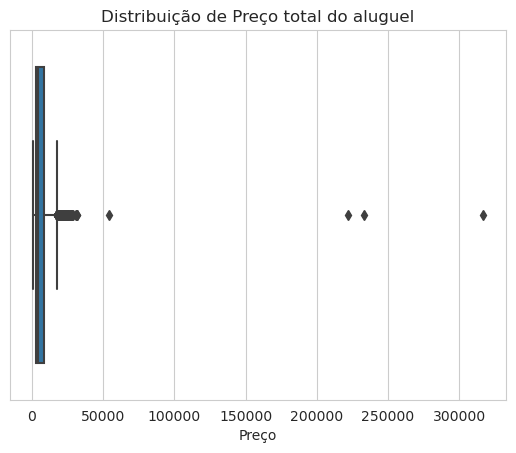

In [125]:
with sns.axes_style('whitegrid'):
    grafico = sns.boxplot(x=precoAluguelImoveisSP_df["total (R$)"])
    grafico.set(title='Distribuição de Preço total do aluguel', xlabel='Preço');


Existe alguns outliers em relação ao preço dos imoveis, isso se dá a imóveis muito grandes em condominios caros removerei esses outliers dos dados pois o objetivo aqui é ver os imóveis que são comumente alugadas pela maioria da população, e os dados mostram que 75% das amostras estão com aluguel abaixo de 8591R$, logo vou retirar todos os dados que estão acima dos 75%.

In [126]:
# Remover outliers
precoAluguelImoveisSP_df = precoAluguelImoveisSP_df[
    (precoAluguelImoveisSP_df['total (R$)'] >= 0) &
    (precoAluguelImoveisSP_df['total (R$)'] <= 8591)
]

In [127]:
precoAluguelImoveisSP_df[['total (R$)']].describe().T

,count,mean,std,min,25%,50%,75%,max
total (R$),4415.0,3899.22265,1994.216507,508.0,2286.0,3550.0,5268.5,8590.0


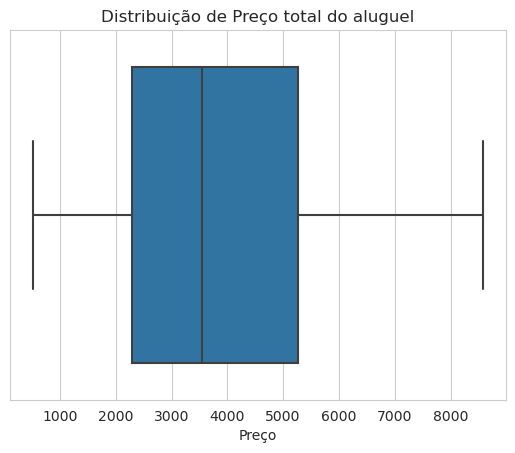

In [128]:
with sns.axes_style('whitegrid'):
    grafico = sns.boxplot(x=precoAluguelImoveisSP_df["total (R$)"])
    grafico.set(title='Distribuição de Preço total do aluguel', xlabel='Preço');


## Área

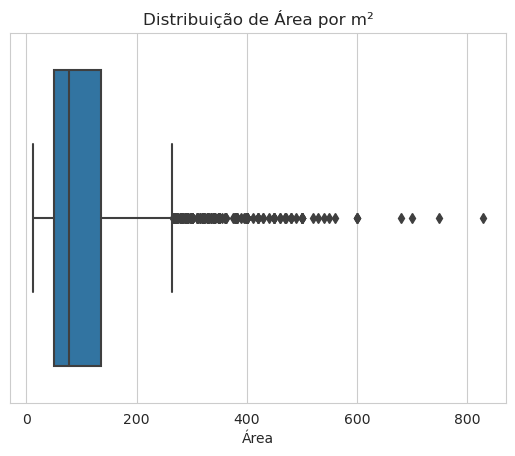

In [129]:
with sns.axes_style('whitegrid'):
    grafico = sns.boxplot(x=precoAluguelImoveisSP_df["area"])
    grafico.set(title='Distribuição de Área por m²', xlabel='Área');


In [130]:
precoAluguelImoveisSP_df[['area']].describe().T

,count,mean,std,min,25%,50%,75%,max
area,4415.0,107.038052,85.165174,11.0,50.0,78.0,136.0,830.0


Existe alguns outliers em relação a área dos imoveis, é perceptivel que 75% dos imoveis tem menos de 150 m², mas existem maiores que ele chegando em maximo de 830 metros quadrados, o que está muito descrepante e fazendo os dados ter uma grande variação.
Logo vou remover esses outliers para não causar tanta variação nos dados.
removerei os dados acima de 75%.

In [131]:
# Remover outliers
precoAluguelImoveisSP_df = precoAluguelImoveisSP_df[
    (precoAluguelImoveisSP_df['area'] >= 0) &
    (precoAluguelImoveisSP_df['area'] <= 136.0)
]

In [132]:
precoAluguelImoveisSP_df[['area']].describe().T

,count,mean,std,min,25%,50%,75%,max
area,3318.0,67.713382,30.138963,11.0,45.0,63.0,90.0,136.0


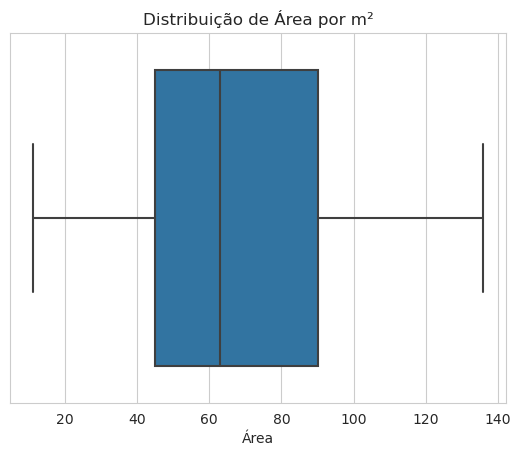

In [133]:
with sns.axes_style('whitegrid'):
    grafico = sns.boxplot(x=precoAluguelImoveisSP_df["area"])
    grafico.set(title='Distribuição de Área por m²', xlabel='Área');

## Valor Condominio

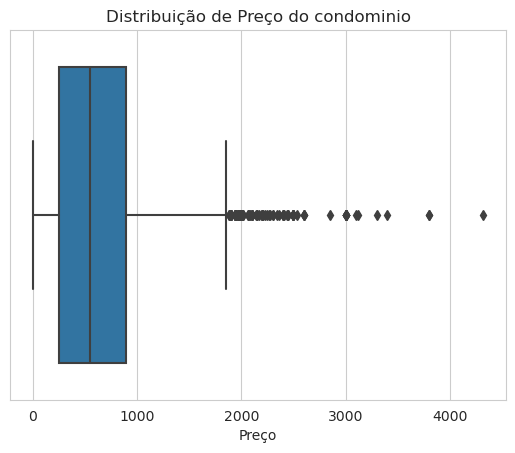

In [134]:
with sns.axes_style('whitegrid'):
    grafico = sns.boxplot(x=precoAluguelImoveisSP_df["hoa (R$)"])
    grafico.set(title='Distribuição de Preço do condominio', xlabel='Preço');


In [135]:
precoAluguelImoveisSP_df[['hoa (R$)']].describe().T

,count,mean,std,min,25%,50%,75%,max
hoa (R$),3318.0,633.119048,546.007548,0.0,250.0,550.0,900.0,4320.0


Novamente os preços até 75% estão relativamente baixo em comparação com o preço maximo, vai ser seguida a mesma abordagem das vezes anteriores

In [136]:
# Remover outliers
precoAluguelImoveisSP_df = precoAluguelImoveisSP_df[
    (precoAluguelImoveisSP_df['hoa (R$)'] >= 0) &
    (precoAluguelImoveisSP_df['hoa (R$)'] <= 900)
]

In [137]:
precoAluguelImoveisSP_df[['hoa (R$)']].describe().T

,count,mean,std,min,25%,50%,75%,max
hoa (R$),2496.0,387.819712,291.656996,0.0,0.0,428.0,616.0,900.0


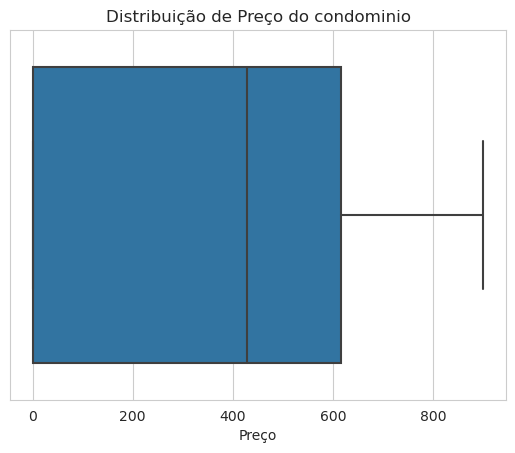

In [138]:
with sns.axes_style('whitegrid'):
    grafico = sns.boxplot(x=precoAluguelImoveisSP_df["hoa (R$)"])
    grafico.set(title='Distribuição de Preço do condominio', xlabel='Preço');


## Mudanças Gerais dos Dados depois das manipulações

In [139]:
precoAluguelImoveisSP_df[['area','rooms','bathroom', 'parking spaces', 'hoa (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']].describe().T

,count,mean,std,min,25%,50%,75%,max
area,2496.0,60.307292,26.415239,11.0,40.0,56.0,75.00,136.0
rooms,2496.0,1.730769,0.748299,1.0,1.0,2.0,2.00,7.0
bathroom,2496.0,1.360176,0.620686,1.0,1.0,1.0,2.00,7.0
parking spaces,2496.0,0.764824,0.785885,0.0,0.0,1.0,1.00,8.0
hoa (R$),2496.0,387.819712,291.656996,0.0,0.0,428.0,616.00,900.0
property tax (R$),2496.0,73.960337,107.210001,0.0,0.0,47.0,110.25,3000.0
fire insurance (R$),2496.0,29.377003,15.352586,4.0,19.0,26.0,36.00,112.0
total (R$),2496.0,2716.981971,1301.768845,508.0,1799.0,2486.0,3408.25,8588.0


### Total do aluguel

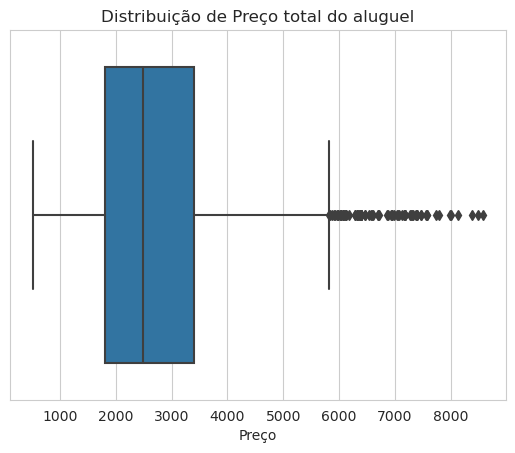

In [140]:
with sns.axes_style('whitegrid'):
    grafico = sns.boxplot(x=precoAluguelImoveisSP_df["total (R$)"])
    grafico.set(title='Distribuição de Preço total do aluguel', xlabel='Preço');


# Responder as Perguntas

## Perguntas
- Permitir Animais de estimação aumenta o preço do aluguel?
- Permitir Animais de estimação tem relação com o tamanho do imóvel?
- Existe uma correlação entre a quantidade de quartos e o valor do condomínio?
- Existe uma correlação entre a quantidade de garagens e o valor do seguro contra incêndio?

## Permitir Animais de estimação aumenta o preço do aluguel?

In [165]:
precoAluguelImoveisSP_df[["total (R$)", 'animal']].groupby('animal').mean()

,total (R$)
animal,
acept,2818.049199
not acept,2480.798128


Existe uma diferença na média, mas não é suficiente para tomar uma decisão.

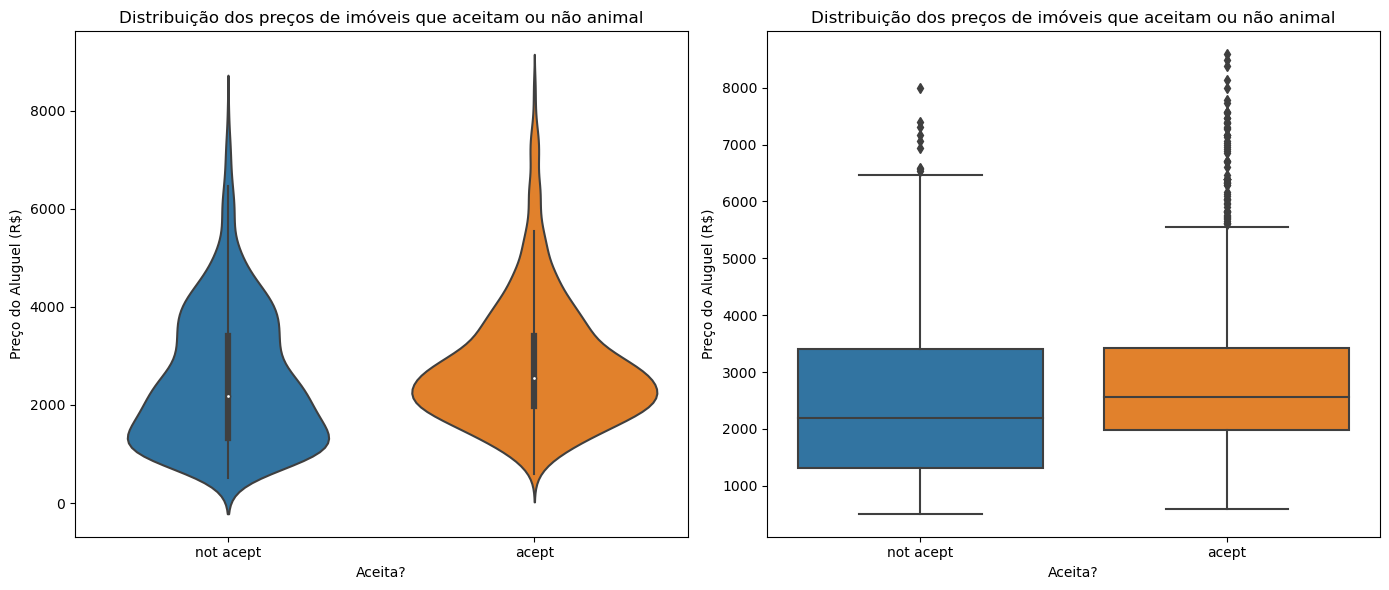

In [232]:
# Criando a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotando o gráfico de violino no primeiro subplot
sns.violinplot(data=precoAluguelImoveisSP_df, x='animal', y='total (R$)', ax=axs[0])
axs[0].set_title('Distribuição dos preços de imóveis que aceitam ou não animal')
axs[0].set_xlabel('Aceita?')
axs[0].set_ylabel('Preço do Aluguel (R$)')

# Plotando o gráfico de caixa no segundo subplot
sns.boxplot(data=precoAluguelImoveisSP_df, x='animal', y='total (R$)', ax=axs[1])
axs[1].set_title('Distribuição dos preços de imóveis que aceitam ou não animal')
axs[1].set_xlabel('Aceita?')
axs[1].set_ylabel('Preço do Aluguel (R$)')

# Ajustando o layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()

É possivel perceber que em imoveis de menor preço existem mais imóveis que não permitem animais do que imóveis que permitem, mas quando esse valor se aproxima de 2000R$, os papeis se invertem e acima disso o preço não tem tanta relevância se é ou não permitido animais.

## Permitir Animais de estimação tem relação com o tamanho do imóvel?

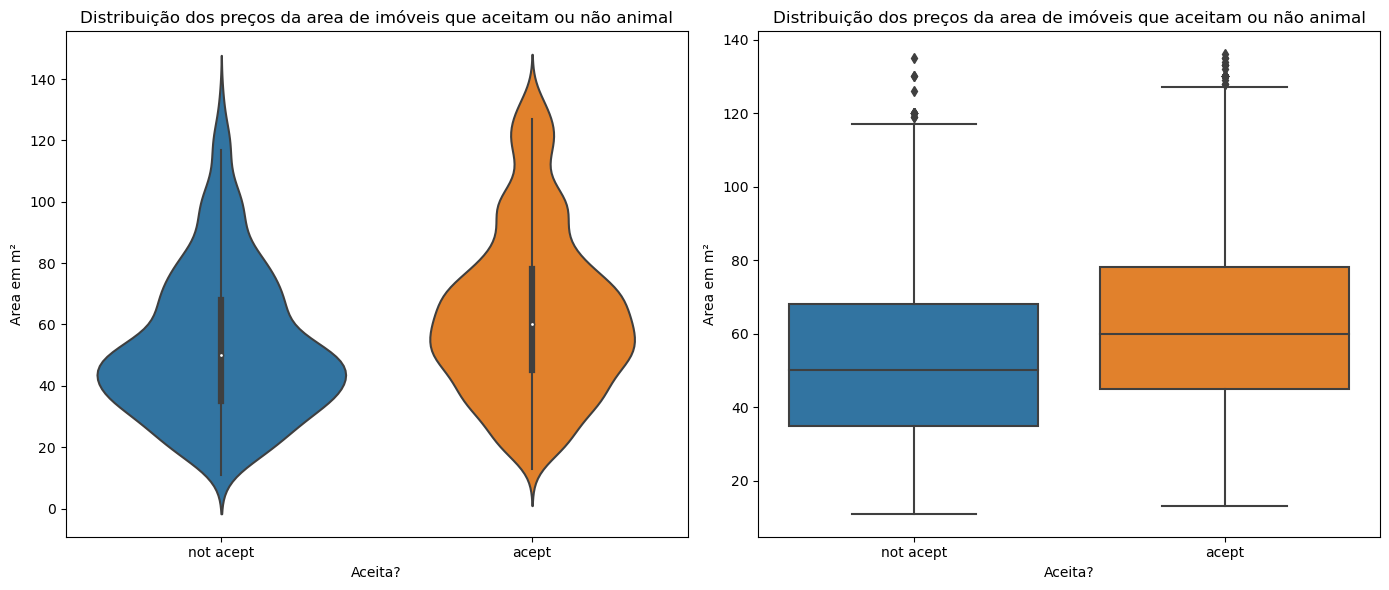

In [233]:

# Criando a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotando o gráfico de violino no primeiro subplot
sns.violinplot(data=precoAluguelImoveisSP_df, x='animal', y='area', ax=axs[0])
axs[0].set_title('Distribuição dos preços da area de imóveis que aceitam ou não animal')
axs[0].set_xlabel('Aceita?')
axs[0].set_ylabel('Area em m²')

# Plotando o gráfico de caixa no segundo subplot
sns.boxplot(data=precoAluguelImoveisSP_df, x='animal', y='area', ax=axs[1])
axs[1].set_title('Distribuição dos preços da area de imóveis que aceitam ou não animal')
axs[1].set_xlabel('Aceita?')
axs[1].set_ylabel('Area em m²')

# Ajustando o layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()

É possivel perceber que em imóveis de maior área existem mais imóveis que permitem animais do que imóveis que não permitem

## Existe uma correlação entre a quantidade de quartos e o valor do condomínio?

Correlação entre Quantidade de quartos e valor do condominio: 0.11411201488166696


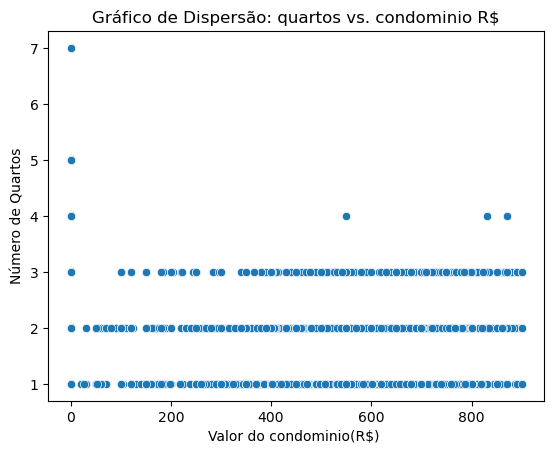

In [244]:

# Calculando a correlação entre as variáveis X e Y
correlation = precoAluguelImoveisSP_df['rooms'].corr(precoAluguelImoveisSP_df['hoa (R$)'])

print("Correlação entre Quantidade de quartos e valor do condominio:", correlation)


# # Plotando o gráfico de dispersão com Seaborn
sns.scatterplot(data=precoAluguelImoveisSP_df, x='hoa (R$)', y='rooms')
plt.title('Gráfico de Dispersão: quartos vs. condominio R$')
plt.xlabel('Valor do condominio(R$) ')
plt.ylabel('Número de Quartos')
plt.show()

Valor da correlação proximo de zero, indicando que a relação é quase inexistente.

## Existe uma correlação entre a quantidade de garagens e o valor do seguro contra incêndio?

Correlação entre Quantidade de quartos e valor do condominio: 0.3555547045991208


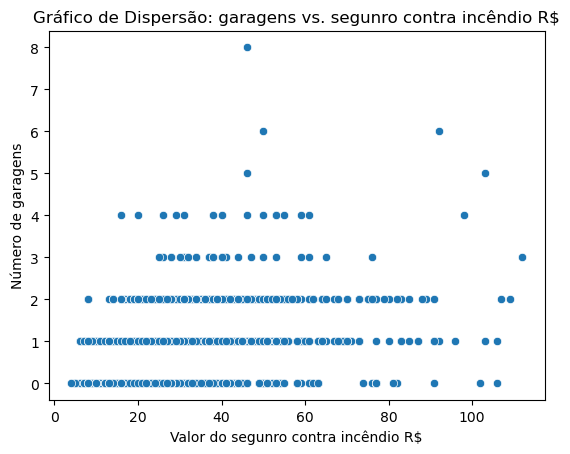

In [243]:

# Calculando a correlação entre as variáveis X e Y
correlation = precoAluguelImoveisSP_df['parking spaces'].corr(precoAluguelImoveisSP_df['fire insurance (R$)'])

print("Correlação entre Quantidade de quartos e valor do condominio:", correlation)


# # Plotando o gráfico de dispersão com Seaborn
sns.scatterplot(data=precoAluguelImoveisSP_df, x='fire insurance (R$)', y='parking spaces')
plt.title('Gráfico de Dispersão: garagens vs. segunro contra incêndio R$')
plt.xlabel('Valor do segunro contra incêndio R$')
plt.ylabel('Número de garagens')
plt.show()

Temos uma correlação de 0.3, ou seja, muito baixa, não da para afirmar que o número de garagens afeta o valor do seguro contra incêndio.